### Tareas pendientes
14/05/2023
- Agregar titulos y subtitulos a los graficos 
- Copiar el codigo de SQL
- Cambiar nombre de variables de graficos
- Decidir que medida de dispersion usar
- Agregar dato de temperatura promedio de la ciudad

# BikeSharing 2022

- Trip duration average and SD, for user type by months of the year, days of the weeks and hours.
- Trip count and SD, for user type by months of the year, days of the week and hours.
- Optional : Try to find a correlation between top start and ending stations with turistic areas.


### Import modules


In [91]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import datetime as dt

### Import csv file previously cleaned in MySQL


In [22]:
path = '2022_tripdata_v2.csv'

trips = pd.read_csv(path)


In [23]:
trips.head()

,ride_id,rideable_type,start_datetime,start_date,start_month,start_weekday,start_time,end_datetime,end_date,end_month,end_weekday,end_time,start_station_name,end_station_name,user_type,trip_duration
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13,January,Thursday,11:59:47,2022-01-13 12:02:44,2022-01-13,January,Thursday,12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,2
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10,January,Monday,08:41:56,2022-01-10 08:46:17,2022-01-10,January,Monday,08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,4
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25,January,Tuesday,04:53:40,2022-01-25 04:58:01,2022-01-25,January,Tuesday,04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,4
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04,January,Tuesday,00:18:04,2022-01-04 00:33:00,2022-01-04,January,Tuesday,00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,14
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20,January,Thursday,01:31:10,2022-01-20 01:37:12,2022-01-20,January,Thursday,01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,member,6


### Transform datatypes 

In [37]:
# Modify data types 
trips['start_datetime'] = pd.to_datetime(trips['start_datetime'], format='%Y-%m-%d %H:%M:%S')
trips['end_datetime'] = pd.to_datetime(trips['end_datetime'], format='%Y-%m-%d %H:%M:%S')


In [38]:
# Glimpse of the dataset
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440114 entries, 0 to 5440113
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   start_datetime      datetime64[ns]
 3   start_date          object        
 4   start_month         object        
 5   start_weekday       object        
 6   start_time          object        
 7   end_datetime        datetime64[ns]
 8   end_date            object        
 9   end_month           object        
 10  end_weekday         object        
 11  end_time            object        
 12  start_station_name  object        
 13  end_station_name    object        
 14  user_type           object        
 15  trip_duration       int64         
dtypes: datetime64[ns](2), int64(1), object(13)
memory usage: 664.1+ MB


### Trips count by month grouped by usertype

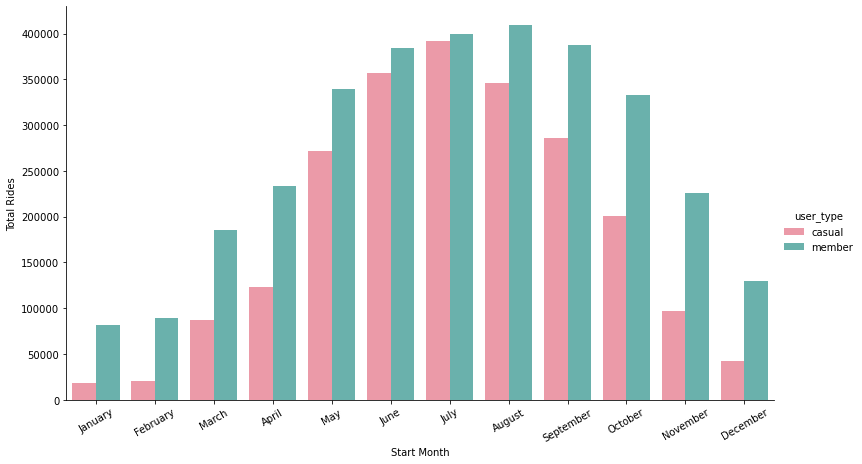

In [84]:
g = sns.catplot(data=trips, kind="count", x="start_month", hue="user_type", 
                palette='husl', alpha=0.8, height=6, aspect = 1.8)
g.set(xlabel="Start Month", ylabel="Total Rides")
g.set_xticklabels(rotation=30, ha="center")

### Count of total trips by weekday and grouped by user type

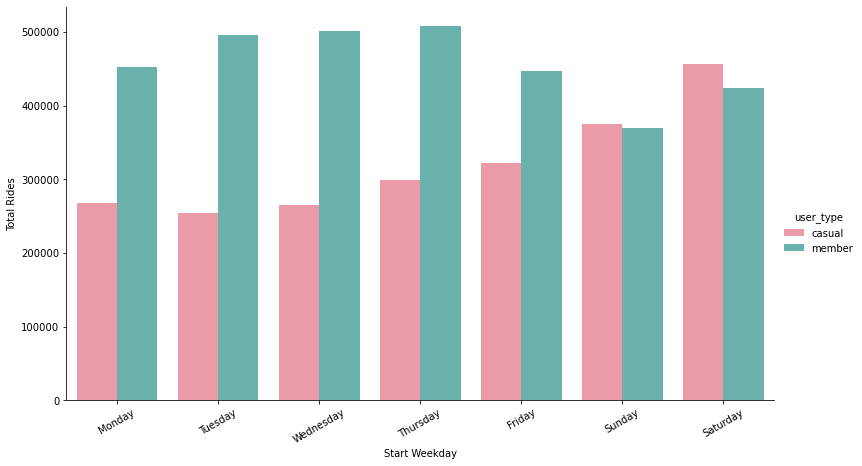

In [83]:

weekdays_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Sunday", "Saturday"]

g = sns.catplot(data=trips, kind="count", x="start_weekday", hue="user_type", 
                order=weekdays_order, palette='husl', alpha=0.8, height=6, aspect=1.8)
g.set(xlabel="Start Weekday", ylabel="Total Rides")
g.set_xticklabels(rotation=30, ha="center")


In [28]:
# To plot average for each day of the week, we need to make a groupby to calculate the count and mean. 

days =pd.DataFrame(trips.groupby(['user_type', 'start_weekday', 'start_date']).size().reset_index(name='count'))
days

,user_type,start_weekday,start_date,count
0,casual,Friday,2022-01-07,392
1,casual,Friday,2022-01-14,908
2,casual,Friday,2022-01-21,783
3,casual,Friday,2022-01-28,277
4,casual,Friday,2022-02-04,463
...,...,...,...,...
725,member,Wednesday,2022-11-30,5954
726,member,Wednesday,2022-12-07,8235
727,member,Wednesday,2022-12-14,3265
728,member,Wednesday,2022-12-21,4586


### Average trips by day and user type

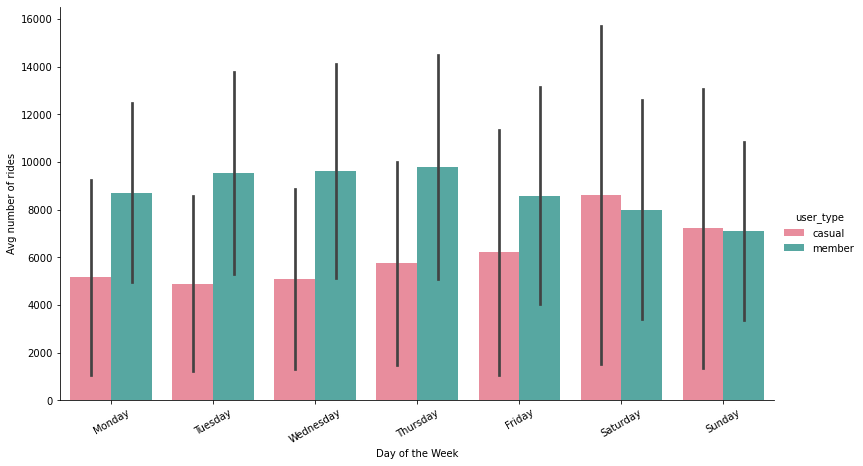

In [82]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x = sns.catplot(data=days, kind='bar', x='start_weekday', y='count', hue='user_type', ci = 'sd',
                order = order, height=6, aspect=1.8, alpha=0.9, palette='husl')
x.set(xlabel='Day of the Week', ylabel='Avg number of rides')
x.set_xticklabels(rotation=30, ha='center')


### Average trip duration by hours of the day

In [39]:
#Extracting hour frome start_datetime

trips['started_hour'] = trips['start_datetime'].dt.hour
trips.head()

,ride_id,rideable_type,start_datetime,start_date,start_month,start_weekday,start_time,end_datetime,end_date,end_month,end_weekday,end_time,start_station_name,end_station_name,user_type,trip_duration,started_hour
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13,January,Thursday,11:59:47,2022-01-13 12:02:44,2022-01-13,January,Thursday,12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,2,11
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10,January,Monday,08:41:56,2022-01-10 08:46:17,2022-01-10,January,Monday,08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,4,8
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25,January,Tuesday,04:53:40,2022-01-25 04:58:01,2022-01-25,January,Tuesday,04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,4,4
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04,January,Tuesday,00:18:04,2022-01-04 00:33:00,2022-01-04,January,Tuesday,00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,14,0
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20,January,Thursday,01:31:10,2022-01-20 01:37:12,2022-01-20,January,Thursday,01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,member,6,1


In [42]:
#Create pivot table with started_hours count

hours =pd.DataFrame(trips.groupby(['user_type', 'start_weekday', 'started_hour']).size().reset_index(name='count'))
hours

,user_type,start_weekday,started_hour,count
0,casual,Friday,0,5310
1,casual,Friday,1,3209
2,casual,Friday,2,1857
3,casual,Friday,3,1175
4,casual,Friday,4,852
...,...,...,...,...
331,member,Wednesday,19,32848
332,member,Wednesday,20,23177
333,member,Wednesday,21,17640
334,member,Wednesday,22,12711


In [75]:
#Adding a categorical column indicating weekday or weekend
hours['day_type'] = hours['start_weekday'].apply(lambda x: 'Weekday' if x in 
                                                 ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')
hours

,user_type,start_weekday,started_hour,count,day_type
0,casual,Friday,0,5310,Weekday
1,casual,Friday,1,3209,Weekday
2,casual,Friday,2,1857,Weekday
3,casual,Friday,3,1175,Weekday
4,casual,Friday,4,852,Weekday
...,...,...,...,...,...
331,member,Wednesday,19,32848,Weekday
332,member,Wednesday,20,23177,Weekday
333,member,Wednesday,21,17640,Weekday
334,member,Wednesday,22,12711,Weekday


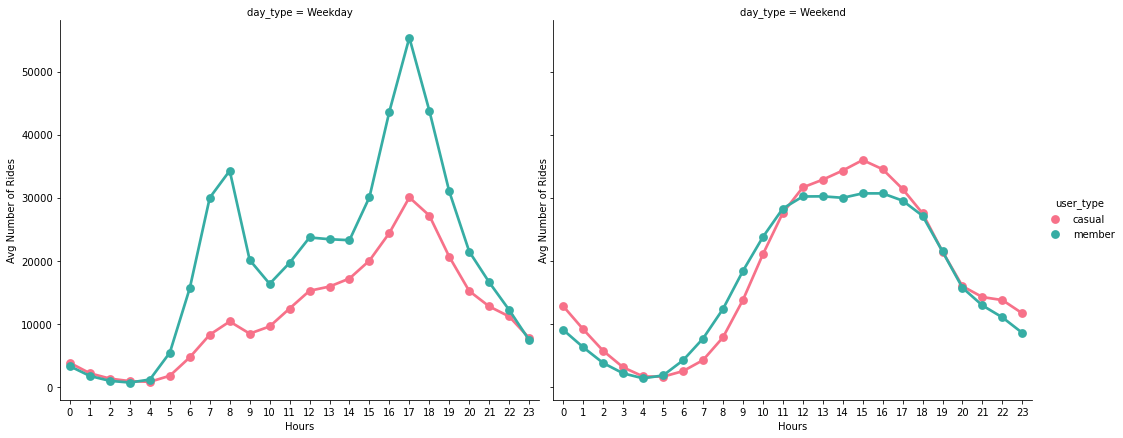

In [81]:
# Calculate the mean trip duration for each user type and started hour separately for weekdays and weekends.
h = sns.catplot(data=hours, kind='point', x='started_hour', y='count', hue='user_type',col='day_type', ci= None,
                height=6, aspect=1.2, alpha=0.9, palette='husl')
h.set(xlabel='Hours', ylabel='Avg Number of Rides')
h.set_xticklabels(ha ='center')


### Trip Duration by Month

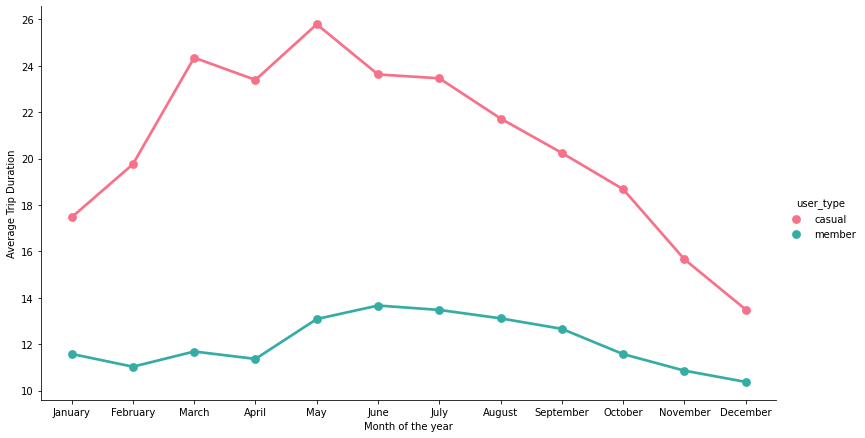

In [85]:
# Trip duration by user type and month

u = sns.catplot(data=trips, kind='point', x='start_month', y='trip_duration', hue='user_type',
               ci=None, height=6, aspect=1.8, alpha=0.9, palette='husl')
u.set(xlabel='Month of the year', ylabel='Average Trip Duration')
u.set_xticklabels(ha='center')

### Trip Duration by Day

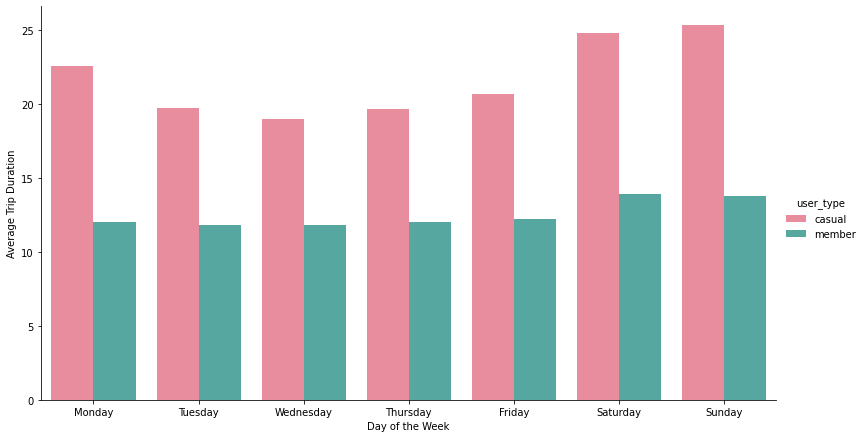

In [88]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
u = sns.catplot(data=trips, kind='bar', x='start_weekday', y='trip_duration', hue='user_type',
               ci=None, order=order, height=6, aspect=1.8, alpha=0.9, palette='husl')
u.set(xlabel='Day of the Week', ylabel='Average Trip Duration')
u.set_xticklabels(ha='center')